In [7]:
df =pd.read_csv('jump_goodwill.csv')

In [8]:
df= df.drop(columns=['id'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37400 entries, 0 to 37399
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        37400 non-null  object 
 1   store_type     37399 non-null  object 
 2   level          37400 non-null  object 
 3   area           37400 non-null  object 
 4   goodwill       37400 non-null  float64
 5   sale_price     37400 non-null  float64
 6   contract_date  37400 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.0+ MB


In [10]:
# 권리금/판매액 *100 (권리금이 판매액의 몇퍼를 차지하는가 확인)
df['real_sale_price_percent']=df['goodwill']/df['sale_price']*100

In [11]:
df[df['store_type'].isnull()]

,address,store_type,level,area,goodwill,sale_price,contract_date,real_sale_price_percent
19468,경기남부 하남시 풍산동,NaN,1층,125.62㎡,5000.0,10000.0,2020-07-13 00:00:00,50.0


In [12]:
# store_type 이 결측치인 경우(경기남부 하남시 풍산동) 삭제 37400 -> 37399
df1 = df.dropna()

### 소분류되어있는 store_type을 대분류로 변경 (d1으로 저장)

In [13]:
d1 = df1['store_type'].replace('한식점','일반음식점')
d1 = d1.replace('일식집','일반음식점')
d1 = d1.replace('레스토랑','일반음식점')
d1 = d1.replace('중국집','일반음식점')
d1 = d1.replace('생선회/해물','일반음식점')
d1 = d1.replace('분식점','일반음식점')
d1 = d1.replace('고깃집','일반음식점')
d1 = d1.replace('돈까스/우동','일반음식점')
d1 = d1.replace('기타음식점','일반음식점')
d1 = d1.replace('제과점','휴게음식점')
d1 = d1.replace('아이스크림점','휴게음식점')
d1 = d1.replace('패스트푸드','휴게음식점')
d1 = d1.replace('피자점','휴게음식점')
d1 = d1.replace('커피점','휴게음식점')
d1 = d1.replace('치킨점','휴게음식점')
d1 = d1.replace('카페','휴게음식점')
d1 = d1.replace('떡볶이/튀김','휴게음식점')
d1 = d1.replace('기타휴게점','휴게음식점')
d1 = d1.replace('바','주류점')
d1 = d1.replace('맥주호프점','주류점')
d1 = d1.replace('노래주점','주류점')
d1 = d1.replace('이자카야','주류점')
d1 = d1.replace('꼬치구이','주류점')
d1 = d1.replace('실내포차','주류점')
d1 = d1.replace('기타주점','주류점')
d1 = d1.replace('노래방','오락스포츠')
d1 = d1.replace('만화방','오락스포츠')
d1 = d1.replace('PC방','오락스포츠')
d1 = d1.replace('당구장','오락스포츠')
d1 = d1.replace('골프연습장','오락스포츠')
d1 = d1.replace('헬스클럽','오락스포츠')
d1 = d1.replace('스크린골프장','오락스포츠')
d1 = d1.replace('요가/필라테스','오락스포츠')
d1 = d1.replace('기타오락스포츠','오락스포츠')
d1 = d1.replace('의류판매점','판매업')
d1 = d1.replace('화장품점','판매업')
d1 = d1.replace('편의점','판매업')
d1 = d1.replace('이동통신점','판매업')
d1 = d1.replace('아이스크림 할인점','판매업')
d1 = d1.replace('슈퍼마켓','판매업')
d1 = d1.replace('문구팬시','판매업')
d1 = d1.replace('1층다용도','판매업')
d1 = d1.replace('기타판매점','판매업')
d1 = d1.replace('피부미용','서비스업')
d1 = d1.replace('미용실','서비스업')
d1 = d1.replace('키즈카페','서비스업')
d1 = d1.replace('네일아트','서비스업')
d1 = d1.replace('마사지','서비스업')
d1 = d1.replace('세차장/카센타','서비스업')
d1 = d1.replace('빨래방','서비스업')
d1 = d1.replace('독서실','서비스업')
d1 = d1.replace('기타서비스업','서비스업')
d1 = d1.replace('학원','기타업종')
d1 = d1.replace('고시원','기타업종')
d1 = d1.replace('모텔','기타업종')
d1 = d1.replace('펜션','기타업종')
d1 = d1.replace('사우나','기타업종')
d1 = d1.replace('주유소','기타업종')
d1 = d1.replace('병원/약국','기타업종')
d1 = d1.replace('다용도점포','기타업종')
d1 = d1.replace('기타창업모음','기타업종')
d1 = pd.DataFrame(d1)

### df1의 'area' 열에서 단위 제거하여 df1_area라고 새로 생성  
### df1의 area와 store_type 제거

In [14]:
df1_area = df1['area'].str.replace('㎡', '')
df1.drop(columns=['area','store_type'], inplace=True)

### d1, df1_area를 df1에 concat

In [15]:
df1 = pd.concat([df1, d1,df1_area], axis=1)

### df1의 'area'열을 float 화 시켜 소수점 2째자리까지 표시
### '제곱미터당 권리금'을 소수점 2째자리까지 표시한 열 생성

In [16]:
df1['area'] = round(df1['area'].astype(float),2)
df1['제곱미터당_권리금'] = round(df1['goodwill']/df1['area'],2)

In [17]:
import datetime

### contract_date를 날짜형식으로 변환 후 년,월만 보이도록하여 year_month 열 새로 생성

In [38]:
df1['year_month'] = df1['contract_date'].astype(str).str[:7]
df1['year'] = df1['contract_date'].astype(str).str[:4]

df1['Year'] = df1['contract_date'].dt.year 
df1['Month'] = df1['contract_date'].dt.month
df1['day'] = df1['contract_date'].dt.day

### 주소를 스페이스를 기준으로 자름

In [19]:
address = df1['address'].apply(lambda x: str(x).split())
address

0             [경기남부, 부천시, 소사본동]
1              [경기북부, 파주시, 동패동]
2              [경기북부, 구리시, 갈매동]
3         [경기남부, 안산시, 단원구, 선부동]
4               [서울시, 양천구, 신월동]
                  ...          
37395    [경기남부, 용인시, 처인구, 김량장동]
37396           [서울시, 강남구, 역삼동]
37397           [서울시, 광진구, 자양동]
37398           [서울시, 강서구, 화곡동]
37399     [경기남부, 수원시, 장안구, 송죽동]
Name: address, Length: 37399, dtype: object

In [20]:
def address(x):
    for i in range(0,len(df1)):
        return str(x).split()[i]

### df1의 address를 지역값을 '지역' 열로 생성
### df1의 address를 시군구 값을 '시' 열로 생성

In [21]:
df1['지역'] = df1['address'].apply(address)
df1['시'] = df1.address.str.split(' ').str[1]

### df1의 '지역'이름을 특별시, 광역시 등으로 바꾸기

In [22]:
df1['지역'] = df1['지역'].replace('서울시','서울특별시')
df1['지역'] = df1['지역'].replace('경기남부','경기도')
df1['지역'] = df1['지역'].replace('인천시','인천광역시')
df1['지역'] = df1['지역'].replace('경기북부','경기도')
df1['지역'] = df1['지역'].replace('부산시','부산광역시')
df1['지역'] = df1['지역'].replace('대전시','대전광역시')
df1['지역'] = df1['지역'].replace('세종시','세종특별자치시')
df1['지역'] = df1['지역'].replace('제주도','제주특별자치도')
df1['지역'] = df1['지역'].replace('울산시','울산광역시')
df1['지역'] = df1['지역'].replace('대구시','대구광역시')
df1['지역'] = df1['지역'].replace('광주시','광주광역시')

### df1에서 모든 데이터가 같은 중복 데이터 삭제 (37399 -> 35771)

In [23]:
df1 = df1.drop_duplicates()

df1.to_csv('ddataset.csv', encoding='cp949')

### 엑셀에서 123층인 열 (1개) 123_1 , 123_2 , 123_3층으로 생성 후 파이썬으로 불러옴 (35771 -> 35773)

In [24]:
df1 = pd.read_csv('ddataset.csv', encoding='cp949', index_col=0)

### df1의 'level' 열 에서 지하층수는 수치 앞에 - 표시,
### 문자인 층 제거
### df1의 'level' 에서 층수를 수치화

In [25]:
df1['level'] = df1['level'].replace('지하1층','-1층')
df1['level'] = df1['level'].replace('지하2층','-2층')
df1['level'] = df1['level'].replace('지하층층','-1층')
df1['level'] = df1['level'].replace('100층','1층')
df1['level'] = df1['level'].replace('01층','1층')
df1['level'] = df1['level'].replace('지하3층','-3층')
df1['level'] = df1['level'].replace('02층','2층')
df1['level'] = df1['level'].replace('0층','1층')
df1['level'] = df1['level'].replace('30층','3층')
df1['level'] = df1['level'].replace('50층','5층')
df1['level'] = df1['level'].replace('03층','3층')
df1['level'] = df1['level'].replace('123_1층','1층')
df1['level'] = df1['level'].replace('123_2층','2층')
df1['level'] = df1['level'].replace('123_3층','3층')
df1['level'] = df1['level'].str.replace('층', '')
df1['level'] = round(df1['level'].astype(int),0)

### df1의 '지역', '시'를 합친 '지역_시'생성

In [26]:
df1['지역_시'] = df1['지역']+' '+df1['시']

# 지역별 유동인구 데이터 (pop)
### df1 데이터와 합치기 위하여 pop 열이름변경
### year_month를 년월까지만 표시하도록 슬라이싱

In [27]:
pop = pd.read_csv('유동인구 최종.csv', encoding='cp949')
pop.columns=['지역_시','year_month','popular']
df1['year_month'] = df1['contract_date'].astype(str).str[:7]
pop['year_month'] = pop['year_month'].astype(str).str[:7]

### df1 데이터와 pop 데이터를 '지역_시','year_month'열 기준으로 합침 -> df2로 이름
### how = 'inner'로 주어 공통적으로 존재하는 값만 나둠 (35773 -> 35324)

In [28]:
df2 = pd.merge(df1,pop,on=['지역_시','year_month'], how='inner')

### 제공 데이터의 'address'를 지오코딩을 활용하여 좌표 생성 -> xy로 호칭 명명
### 기존의 df2 데이터와 xy 데이터를 merge 하여 df2 새로 생성 (35324 -> 35289)

In [29]:
xy = pd.read_csv('지역좌표.csv', encoding = 'cp949', index_col=0)

In [30]:
df2 = pd.merge(df2,xy,on='address', how='inner')

### 전국 대학교 개수 데이터 불러옴 (university)
### university 의 columns = ['지역','year','Num'] 로 변경

In [31]:
university = pd.read_csv('전국 대학교.csv', encoding = 'cp949')
university.columns=['지역','year','Num']

### df2 데이터와 university 데이터 를 지역과 year 기준으로 inner 조인

In [32]:
df3 = pd.merge(df2,university,on=['지역','year'], how='inner')

### 전국 지하철주소 데이터를 지오코딩 한 데이터 불러옴 (station)
### station의 columns = ['address','경도','위도']로 변경

In [33]:
station = pd.read_csv('지하철주소.csv', encoding='cp949')
station.columns=['address','경도','위도']

In [34]:
from haversine import haversine # 좌표간 거리 계산 패키지

### station 과 df2의 각각 경도, 위도 를 활용하여 거리의 최솟값 계산

new = []
for i in range(0,len(df3)):
    distance = []
    for j in range(0,len(station)):
        distance.append(haversine((station['경도'][j], station['위도'][j]),
                                  (df3['경도'][i], df3['위도'][i])))
    s_distance = min(distance)
    new.append(s_distance)

df3['distance'] = pd.DataFrame(new)

### 코로나 데이터 covid 생성
### 이름 변경
### 세종시(세종특별자치시) 행 삭제

In [36]:
covid = pd.read_csv('코로나 완성.csv', encoding='cp949')
covid.columns = ['year_month','지역','CovidNum']
covid['year_month'] = covid['year_month'].astype(str).str[:7]

covid_name = covid['지역'].replace('제주도','제주특별자치도')
covid['지역'] = covid_name

idx = covid[covid['지역'] == '세종시'].index
covid = covid.drop(idx)

### contract_date를 데이트타임으로 변경

In [39]:
df3['contract_date'] = pd.to_datetime(df3['contract_date'])

### 코로나 전(df3_1), 후(df3_2) 데이터 구별
#### 코로나 전 데이터에 CovidNum 생성하여 0으로 생성

In [40]:
df3_1 = df3[df3['contract_date']<'2020-01-01']
df3_1['CovidNum'] = 0

df3_2 = df3[df3['contract_date']>='2020-01-01']

### 코로나 후 데이터에 covid 데이터 merge

In [41]:
df3_3 =pd.merge(df3_2,covid, on=['year_month','지역'], how='inner')

In [356]:
df4 = pd.concat([df3_1,df3_3],axis=0)
df4.reset_index(drop=True,inplace = True)

df4.to_csv('finaldata.csv',encoding='cp949',index=False)

In [357]:
df4 = pd.read_csv('finaldata.csv',encoding = 'cp949')

# EDA

In [358]:
df4[df4['level']==123]

,address,level,goodwill,sale_price,contract_date,real_sale_price_percent,store_type,area,제곱미터당_권리금,year_month,...,weekday,지역,시,지역_시,popular,경도,위도,Num,distance,CovidNum
33722,경기남부 양평군 용문면,123,5000,8000,2020-02-01,62.5,휴게음식점,595.04,8.4,Feb-20,...,5,경기도,양평군,경기도 양평군,18,127.587014,37.514347,61,4.223953,74


In [359]:
df4 = df4.drop(index=33722, axis=0)

In [360]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35288 entries, 0 to 35288
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address                  35288 non-null  object 
 1   level                    35288 non-null  int64  
 2   goodwill                 35288 non-null  int64  
 3   sale_price               35288 non-null  int64  
 4   contract_date            35288 non-null  object 
 5   real_sale_price_percent  35288 non-null  float64
 6   store_type               35288 non-null  object 
 7   area                     35288 non-null  float64
 8   제곱미터당_권리금                35288 non-null  float64
 9   year_month               35288 non-null  object 
 10  year                     35288 non-null  int64  
 11  weekday                  35288 non-null  int64  
 12  지역                       35288 non-null  object 
 13  시                        35288 non-null  object 
 14  지역_시                  

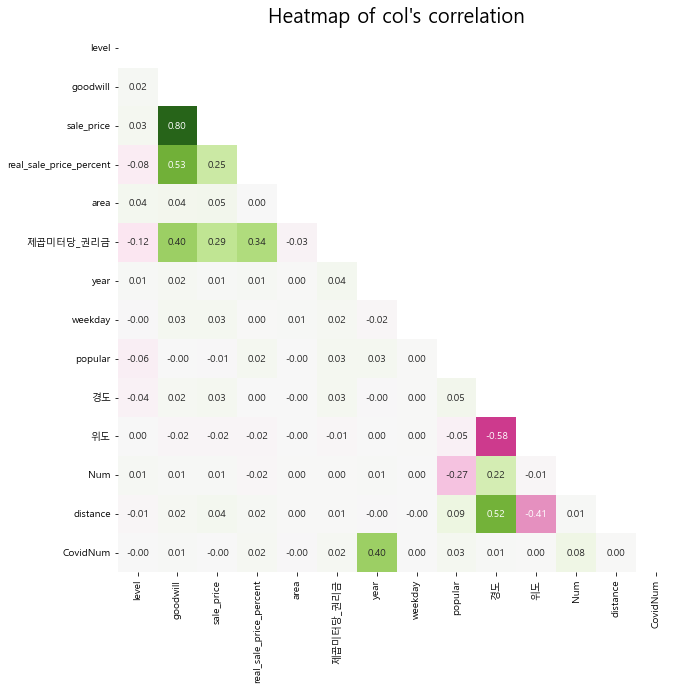

In [361]:
# 수치형 데이터 간의 상관계수를 나타내는 히트맵
df_corr = df4.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True, cmap='PiYG', fmt='.2f',center=0, mask= mask , cbar=False)
plt.title("Heatmap of col's correlation", fontsize=20)
plt.show()

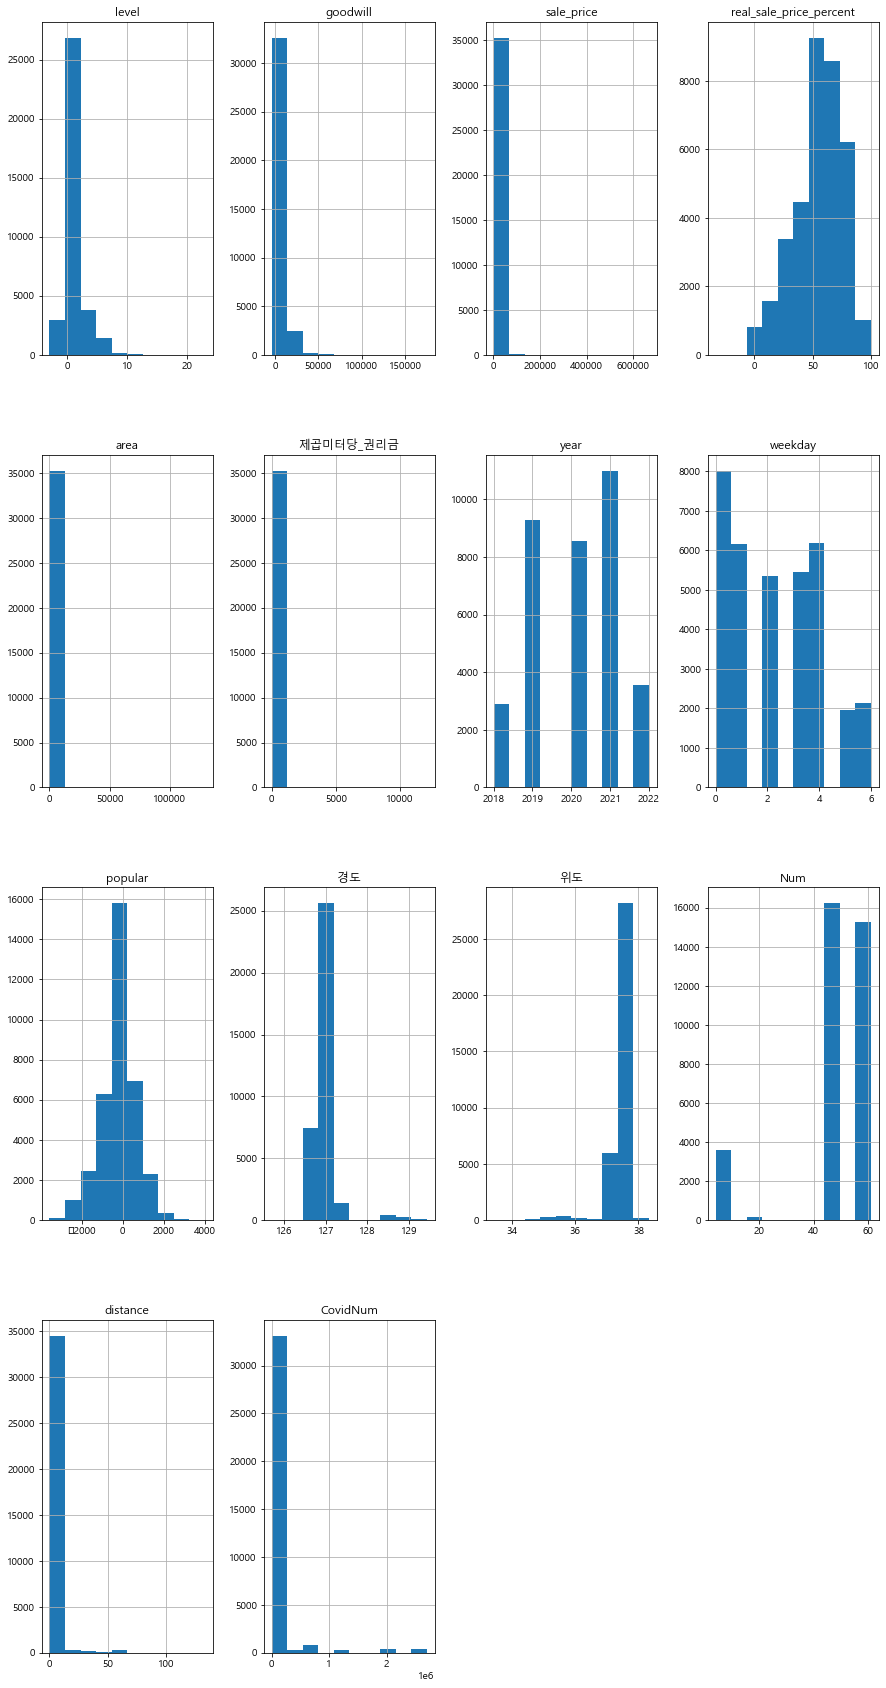

In [362]:
# 각 수치별 빈도
df4.hist(figsize=(15,30))
plt.show()

In [363]:
mean_price = df4.groupby(['store_type'])['goodwill'].mean().to_frame().sort_values(by='goodwill', ascending = False)
mean_good = df4.groupby(['store_type'])['제곱미터당_권리금'].mean().to_frame().sort_values(by='제곱미터당_권리금', ascending = False)

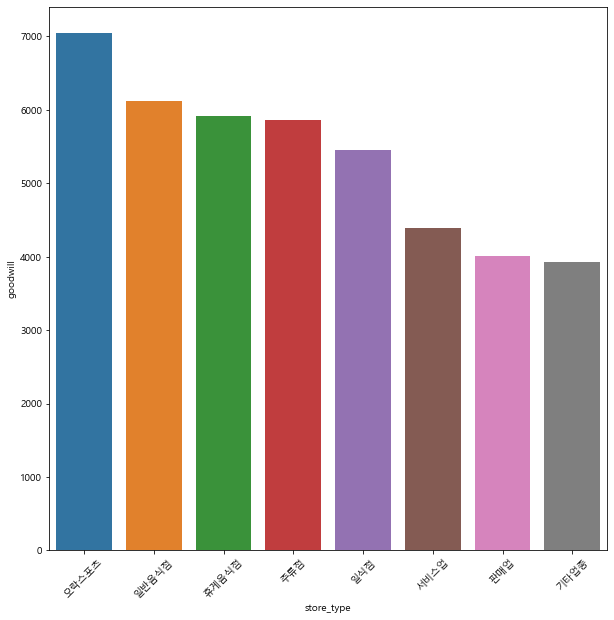

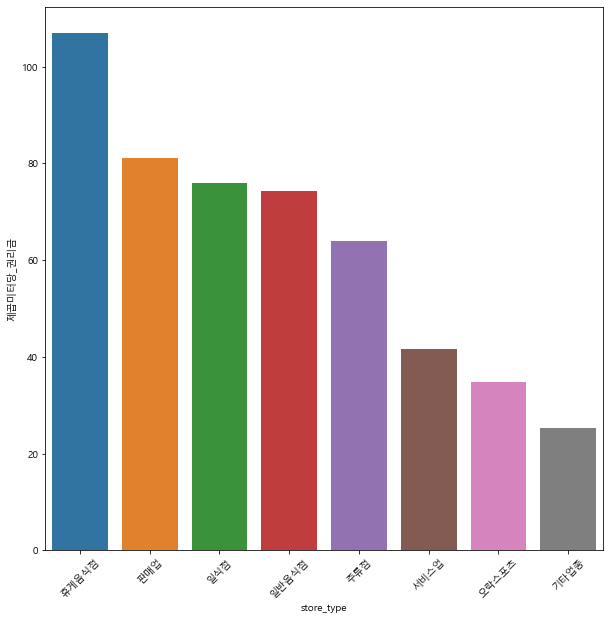

In [364]:
# store_type 별 goodwill 내림차순
plt.figure(figsize = (10,10))
sns.barplot(data = mean_price , x=mean_price.index , y='goodwill')
plt.xticks(rotation=45)
plt.show()
print('\n')
# store_type 별 제곱미터당_권리금 내림차순
plt.figure(figsize = (10,10))
sns.barplot(data = mean_good , x=mean_good.index , y='제곱미터당_권리금')
plt.xticks(rotation=45)
plt.show()

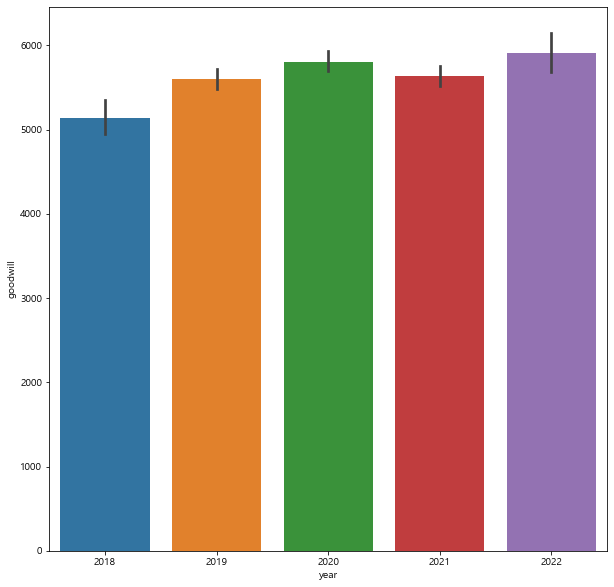

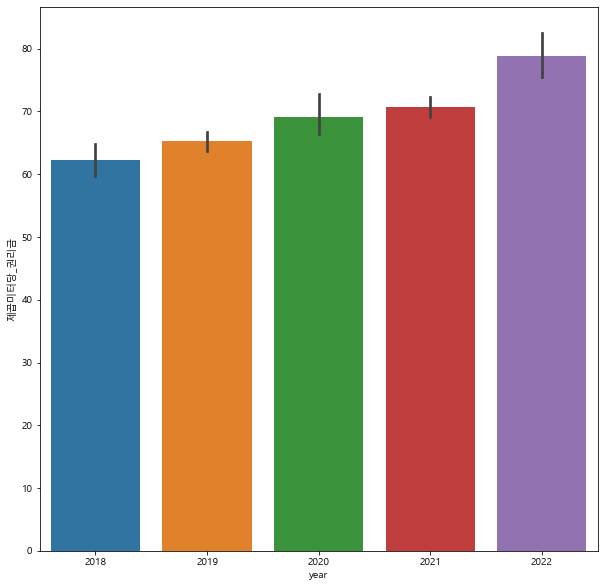

In [365]:
# 연도별 goodwill 현황
plt.figure(figsize=(10,10))
sns.barplot(x = df4.year, y = df4.goodwill)
plt.show()
print('\n')
# 연도별 제곱미터당_권리금
plt.figure(figsize=(10,10))
sns.barplot(x=df4.year, y= df4.제곱미터당_권리금)
plt.show()

In [366]:
mean_price_2 = df4.groupby(['지역'])['goodwill'].mean().to_frame().sort_values(by='goodwill', ascending = False)
mean_good_2 = df4.groupby(['지역'])['제곱미터당_권리금'].mean().to_frame().sort_values(by='제곱미터당_권리금', ascending = False)

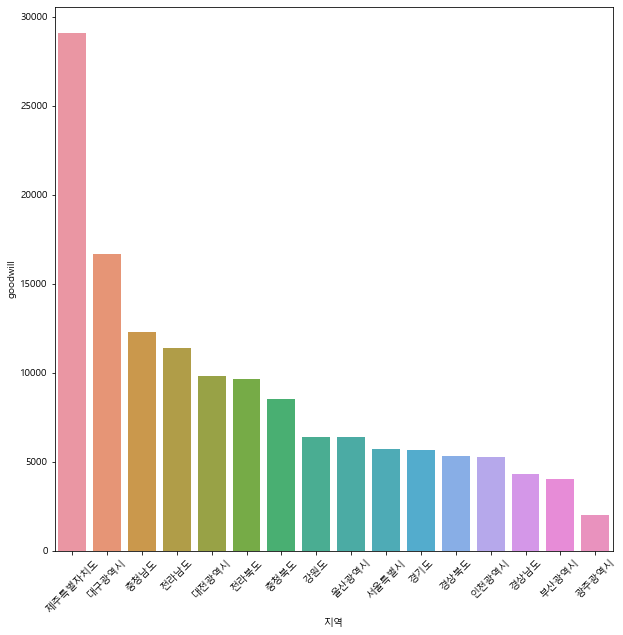

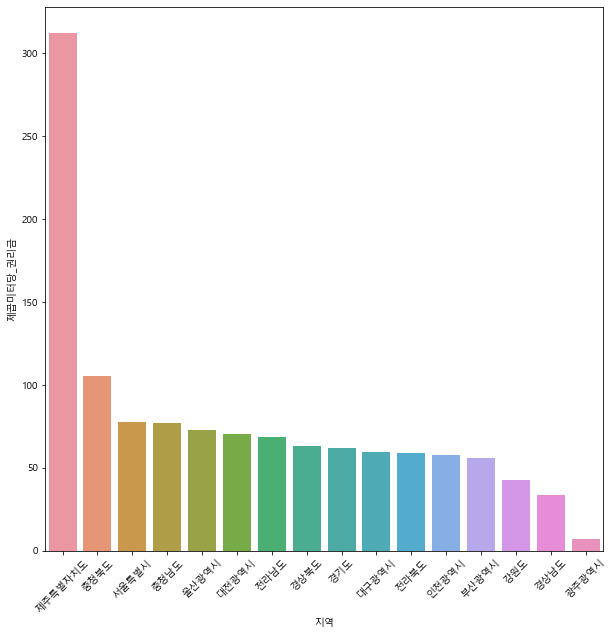

In [367]:
# 지역 별 goodwill 내림차순
plt.figure(figsize = (10,10))
sns.barplot(data = mean_price_2 , x=mean_price_2.index , y='goodwill')
plt.xticks(rotation=45)
plt.show()
print('\n')
# 지역별 제곱미터당_권리금 내림차순
plt.figure(figsize = (10,10))
sns.barplot(data = mean_good_2 , x=mean_good_2.index , y='제곱미터당_권리금')
plt.xticks(rotation=45)
plt.show()

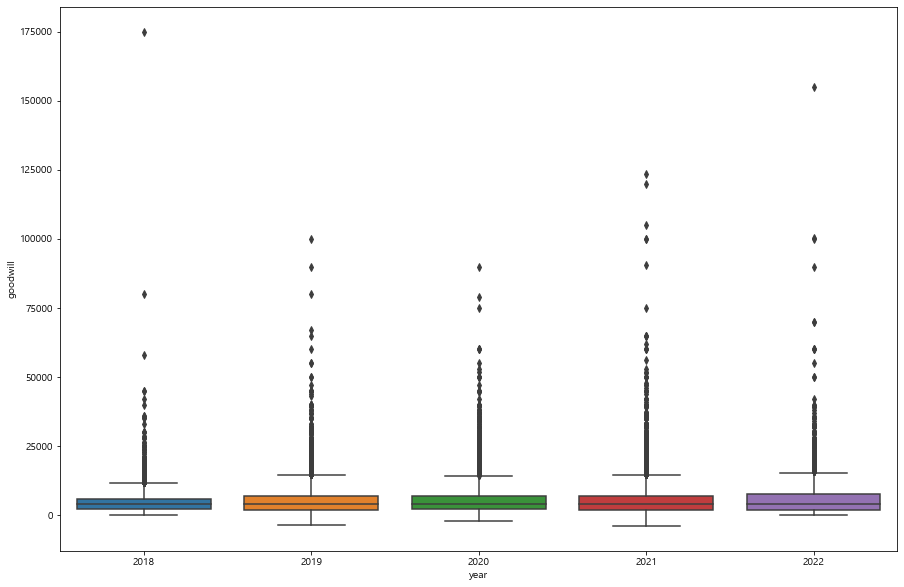

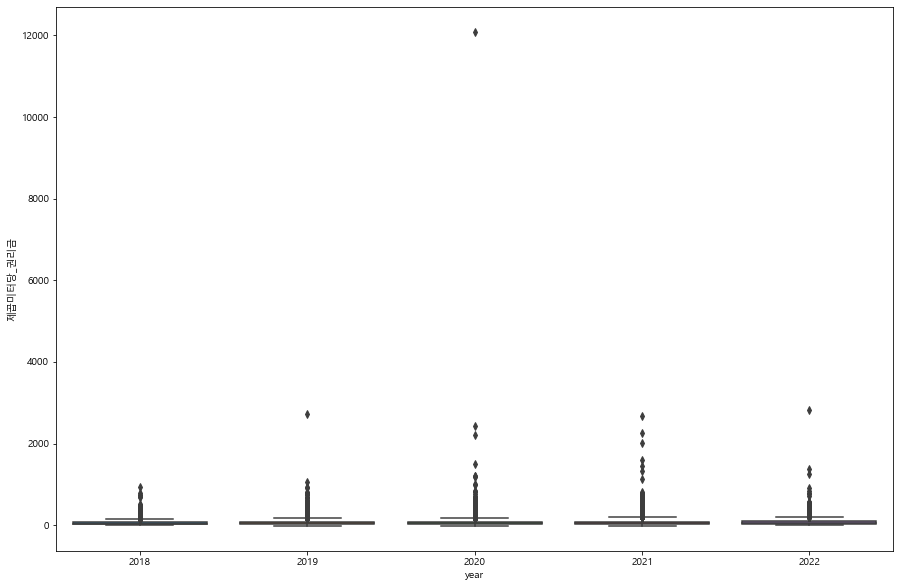

In [368]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df4.year, y= df4.goodwill)
plt.show()
print('\n')
plt.figure(figsize=(15,10))
sns.boxplot(x=df4.year, y= df4.제곱미터당_권리금)
plt.show()

In [369]:
df4[df4['제곱미터당_권리금']>12000]
df4 = df4.drop(index=19873, axis=0)

In [370]:
df4.reset_index(drop=True,inplace = True)

df4.to_csv('미안해.csv',encoding='cp949', index=False)

# 모델링 전 사전 처리

In [120]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35287 entries, 0 to 35286
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address                  35287 non-null  object 
 1   level                    35287 non-null  int64  
 2   goodwill                 35287 non-null  int64  
 3   sale_price               35287 non-null  int64  
 4   contract_date            35287 non-null  object 
 5   real_sale_price_percent  35287 non-null  float64
 6   store_type               35287 non-null  object 
 7   area                     35287 non-null  float64
 8   제곱미터당_권리금                35287 non-null  float64
 9   year_month               35287 non-null  object 
 10  year                     35287 non-null  int64  
 11  weekday                  35287 non-null  int64  
 12  지역                       35287 non-null  object 
 13  시                        35287 non-null  object 
 14  지역_시                  

In [372]:
# 모델에 필요없다 생각하는 열 삭제
df4_1 = df4.drop(columns=['address','sale_price','contract_date','real_sale_price_percent','area',
                          'weekday','지역','year_month','year','시','지역_시','경도','위도'])

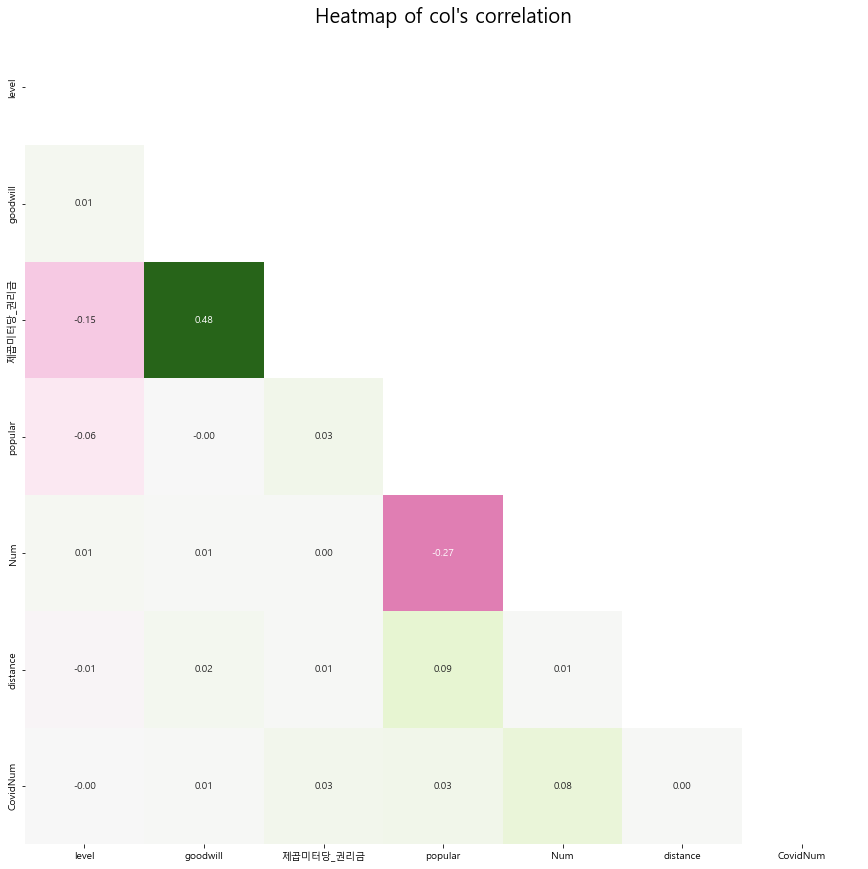

In [373]:
df_corr = df4_1.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,annot=True, cmap='PiYG', fmt='.2f',center=0, mask= mask , cbar=False)
plt.title("Heatmap of col's correlation", fontsize=20)
plt.show()

In [439]:
from sklearn.model_selection import train_test_split # 분할
from sklearn.model_selection import cross_val_score, cross_validate,KFold #교차검증
from sklearn.preprocessing import MinMaxScaler # 정규화
from sklearn.model_selection import GridSearchCV # grid
from sklearn.preprocessing import RobustScaler # 정규화

# 모델
from sklearn import linear_model
from sklearn.linear_model import LinearRegression # 선형 회귀분석
from sklearn.ensemble import RandomForestRegressor # 랜포 
from sklearn.linear_model import Ridge, Lasso # ridge, lasso 선형
from xgboost import XGBRegressor # 앙상블 모델(부스팅)
import xgboost as xgb  #시각화
from xgboost import plot_tree # xgboost 시각화 함수
from matplotlib.pylab import rcParams
# 성능 평가
from sklearn.metrics import mean_squared_error# mse
from sklearn.metrics import r2_score

## 더미화(원-핫인코딩)

In [375]:
df4_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35287 entries, 0 to 35286
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   level       35287 non-null  int64  
 1   goodwill    35287 non-null  int64  
 2   store_type  35287 non-null  object 
 3   제곱미터당_권리금   35287 non-null  float64
 4   popular     35287 non-null  int64  
 5   Num         35287 non-null  int64  
 6   distance    35287 non-null  float64
 7   CovidNum    35287 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 2.2+ MB


In [376]:
df4_1 = pd.get_dummies(df4_1, columns = ['store_type'])

In [377]:
df4_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35287 entries, 0 to 35286
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   level             35287 non-null  int64  
 1   goodwill          35287 non-null  int64  
 2   제곱미터당_권리금         35287 non-null  float64
 3   popular           35287 non-null  int64  
 4   Num               35287 non-null  int64  
 5   distance          35287 non-null  float64
 6   CovidNum          35287 non-null  int64  
 7   store_type_기타업종   35287 non-null  uint8  
 8   store_type_서비스업   35287 non-null  uint8  
 9   store_type_오락스포츠  35287 non-null  uint8  
 10  store_type_일반음식점  35287 non-null  uint8  
 11  store_type_일식점    35287 non-null  uint8  
 12  store_type_주류점    35287 non-null  uint8  
 13  store_type_판매업    35287 non-null  uint8  
 14  store_type_휴게음식점  35287 non-null  uint8  
dtypes: float64(2), int64(5), uint8(8)
memory usage: 2.2 MB


# 정규화

In [382]:
features = ['level','goodwill','제곱미터당_권리금','popular','Num','distance','CovidNum']
scaler = MinMaxScaler()
df4_1[features]=scaler.fit_transform(df4_1[features])

In [485]:
X = df4_1.drop(['goodwill','store_type_오락스포츠'],axis=1)
y = df4_1['goodwill']

In [486]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

# 일반 선형

In [385]:
lor = LinearRegression()
lor.fit(X_train,y_train)

LinearRegression()

In [386]:
y_pred = lor.predict(X_test)
print('RMSE : ',mean_squared_error(y_pred,y_test, squared=False))
print('r2_score : ',r2_score(y_test, y_pred))

RMSE :  0.0298160479061187
r2_score :  0.29385180556612545


In [387]:
print('goodwill =')
for i in range(len(X.columns)):
    if i != len(X.columns) -1:
        print(round(lor.coef_[i],4), '*', X.columns[i], '+')
    else:
        print(round(lor.coef_[i],4), '*', X.columns[i])

goodwill =
0.0457 * level +
0.6131 * 제곱미터당_권리금 +
-0.005 * popular +
0.0004 * Num +
0.0118 * distance +
0.0002 * CovidNum +
-0.0168 * store_type_기타업종 +
-0.0163 * store_type_서비스업 +
-0.0114 * store_type_일반음식점 +
-0.015 * store_type_일식점 +
-0.0111 * store_type_주류점 +
-0.0247 * store_type_판매업 +
-0.0195 * store_type_휴게음식점


# ridge

In [389]:
ridge = Ridge()

In [390]:
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print('RMSE : ',mean_squared_error(y_pred,y_test, squared=False))
print('r2_score : ',r2_score(y_test, y_pred))

RMSE :  0.02982400441889835
r2_score :  0.2934748792339833


In [391]:
print('goodwill =')
for i in range(len(X.columns)):
    if i != len(X.columns) -1:
        print(round(ridge.coef_[i],4), '*', X.columns[i], '+')
    else:
        print(round(ridge.coef_[i],4), '*', X.columns[i])

goodwill =
0.044 * level +
0.5807 * 제곱미터당_권리금 +
-0.0048 * popular +
0.0004 * Num +
0.0117 * distance +
0.0003 * CovidNum +
-0.0168 * store_type_기타업종 +
-0.0162 * store_type_서비스업 +
-0.011 * store_type_일반음식점 +
-0.0145 * store_type_일식점 +
-0.0108 * store_type_주류점 +
-0.0243 * store_type_판매업 +
-0.0187 * store_type_휴게음식점


In [321]:
0.2*(df4['goodwill'].max()-df4['goodwill'].min())+df4['goodwill'].min()

31809.6

# XGBoost

In [499]:
xgb = XGBRegressor(n_estimators=200, max_depth=6,
                     eta=0.1, subsample=0.8, colsample_bytree=0.8)

In [500]:
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print('RMSE : ',mean_squared_error(y_pred,y_test, squared=False))
print('r2_score : ',r2_score(y_test, y_pred))

RMSE :  0.0273415597358582
r2_score :  0.4061971610433852


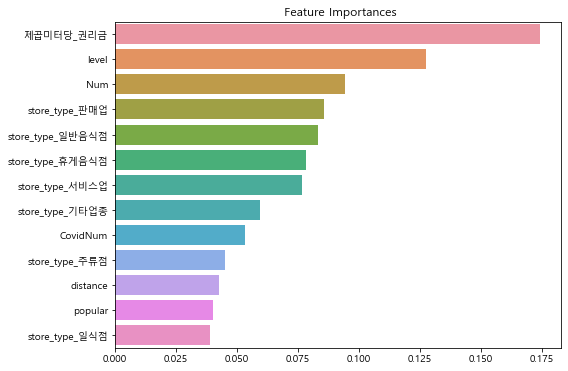

In [495]:
xgb_importances_values = xgb.feature_importances_
xgb_importances = pd.Series(xgb_importances_values, index= X_train.columns)
xgb_top = xgb_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title(' Feature Importances')
sns.barplot(x=xgb_top, y=xgb_top.index)
plt.show()

In [496]:
pd.DataFrame(round((xgb_top),4),columns=['Feature importances'])

,Feature importances
제곱미터당_권리금,0.1744
level,0.1277
Num,0.0942
store_type_판매업,0.0857
store_type_일반음식점,0.0833
store_type_휴게음식점,0.0784
store_type_서비스업,0.0769
store_type_기타업종,0.0594
CovidNum,0.0533
store_type_주류점,0.0452


# 

# 

# Random Forest

In [352]:
rf = RandomForestRegressor(random_state=0,max_depth = 8, min_samples_leaf = 8,
                           min_samples_split = 8, n_estimators = 200)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

In [335]:
y_pred = rf.predict(X_test)
print('RMSE : ',mean_squared_error(y_pred,y_test, squared=False))
print('r2_score : ',r2_score(y_test, y_pred))

RMSE :  0.027743139525738085
r2_score :  0.38862607810127137


In [354]:
pd.DataFrame(round((rf_top),4), columns=['Feature importances'])

,Feature importances
제곱미터당_권리금,0.6629
level,0.1975
distance,0.0400
popular,0.0249
CovidNum,0.0243
store_type_일반음식점,0.0228
Num,0.0090
store_type_서비스업,0.0070
store_type_휴게음식점,0.0053
store_type_주류점,0.0028
